In [24]:
import pandas as pd
from sklearn.utils import resample
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import ConfusionMatrixDisplay

In [25]:
#Carregar os dados
dados_crus = pd.read_csv('doacao.csv', header = 0, 
                          na_values = "?", comment='\t', 
                          sep=",", skipinitialspace=True)

dataset = dados_crus.copy()
#dataset

In [26]:
#Separar em Sim doou e Não doou
df_SIM = dataset[dataset['Doou']==1]
df_NAO = dataset[dataset['Doou']==0]

#Olhar se tem os mesmos valores de SIM e NÃO
#print(len(df_SIM))
#print(len(df_NAO))

In [27]:

if len(df_NAO) > len(df_SIM):
    #Reduzir o numero da NAO para ficar igual ao SIM
    df_NAO_RED = resample(df_NAO,
                          replace = False,
                          n_samples = len(dataset) - len(df_SIM),
                          random_state = 42
                          )

    #len(df_NAO_RED)
else:
    #Reduzir o numero da SIM para ficar igual ao NAO
    df_SIM_RED = resample(df_SIM,
                          replace = False,
                          n_samples = len(df_NAO),
                          random_state = 42
                          )
    
    #len(df_SIM_RED)

In [28]:
#Juntar novamente os dados apos a redução
if len(df_NAO) > len(df_SIM):
    df_novo = pd.concat([df_SIM, df_NAO_RED])
else:
    df_novo = pd.concat([df_SIM_RED, df_NAO])

#len(df_novo)

In [29]:
#Separa os dados de entrada (X) e dos dados de saída (y)
X = df_novo.drop('Doou', axis = 1).copy()
y = df_novo['Doou'].copy()

In [30]:
# Centralizar e padronizar os dados
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [31]:
# Centralizar e padronizar os dados
# Cada coluna deve ter média = 0 e desvio padrão = 1
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, random_state=42, test_size=0.10)

#X_train_pad = scale(X_train)
#X_test_pad = scale(X_test)

#print(len(X_train), len(X_test))

In [32]:
# Iniciar a construção da SVM com ajuste de hiperparâmetros usando GridSearchCV
param_grid = {
    'C': [0.1, 1, 10, 100, 1000],
    'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
    'kernel': ['rbf', 'linear', 'poly', 'sigmoid']
}

#Determina os melhores atributos para a tomada de decisão
grid = GridSearchCV(SVC(random_state=42), param_grid, refit=True, verbose=2)
grid.fit(X_train, y_train)

# Melhor estimador encontrado pelo GridSearchCV
best_estimator = grid.best_estimator_

# Previsões e avaliação do modelo
y_pred = best_estimator.predict(X_test)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=

In [33]:
#Incia a construção da SVM
#clf_svm = SVC(random_state=42)
#clf_svm.fit(X_train, y_train)

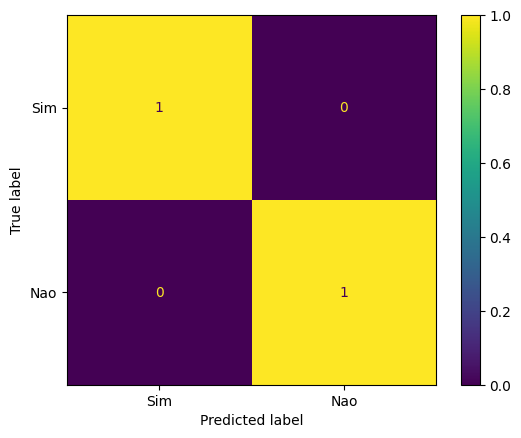

In [34]:
#Matriz de confusão para análisar os dados de teste
ConfusionMatrixDisplay.from_estimator(best_estimator,
                      X_test,
                      y_test,
                      values_format = 'd',
                      display_labels=['Sim', 'Nao'])

In [35]:
# Dados fornecidos para previsão
novos_dados = pd.DataFrame({
    'Recencia': [2, 18, 21, 21],
    'Frequencia': [2, 2, 3, 3],
    'Quantidade': [500, 500, 750, 750],
    'Tempo': [4, 23, 35, 64]
})

# Padronizar os novos dados com o mesmo scaler usado anteriormente
novos_dados_scaled = scaler.transform(novos_dados)

# Fazer previsões com o modelo treinado
novas_previsoes = best_estimator.predict(novos_dados_scaled)

# Exibir as previsões
print("Previsões para os novos dados (1 para Doou e 0 para Não Doou):")
print(novas_previsoes)

Previsões para os novos dados (1 para Doou e 0 para Não Doou):
[0 0 0 0]
